In [ ]:
# Importing the required function
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Helps you to label the images
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop  # Optimization function
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Converting the range of 0-255 into 0-1
train = ImageDataGenerator(rescale= 1/255)

validation = ImageDataGenerator(rescale= 1/255)

In [ ]:
#img = image.load_img("/content/drive/MyDrive/Minor Project/Base Project/Training/Non Vehicle/extra1.png")

In [ ]:
  # Here resizing the data to 200,200
  # flow_from_directory : loads the image dataset in memory and generates batches of augmented data.
  train_dataset = train.flow_from_directory('/content/drive/MyDrive/Image_Classification/data/train',
                                            target_size = (200,200), batch_size = 60,
                                            class_mode = 'binary')

  validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/Image_Classification/data/validation',
                                            target_size = (200,200), batch_size = 60,
                                            class_mode = 'binary')


Found 12516 images belonging to 2 classes.
Found 2868 images belonging to 2 classes.


In [ ]:
# Neural Network can't take string as for prediction so converted into numericals
train_dataset.class_indices

{'train_non_vehicles': 0, 'train_vehicles': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Sequential Model
# Adding convolution (with 16 filters of 3*3) & Pooling layers to our model
# Increasing the filters to increase no. of channels
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(256,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')


                                    ])

In [ ]:
# Compilation of the model
# loss functions is to compute the quantity that a model should seek to minimize during training.
model.compile(loss='binary_crossentropy',
  optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
  metrics=['acc'])


In [ ]:
# CallBack : When desired accuracy attained it will stop
model_fit = model.fit(train_dataset, steps_per_epoch = 80,
                      epochs = 20,
                      validation_data = validation_dataset)

Epoch 1/20
80/80 [==============================] - 1289s 16s/step - loss: 1.3911 - acc: 0.7010 - val_loss: 0.4533 - val_acc: 0.8288
Epoch 2/20
80/80 [==============================] - 362s 5s/step - loss: 0.3563 - acc: 0.8619 - val_loss: 0.2100 - val_acc: 0.9170
Epoch 3/20
80/80 [==============================] - 237s 3s/step - loss: 0.5739 - acc: 0.9060 - val_loss: 0.1596 - val_acc: 0.9390
Epoch 4/20
80/80 [==============================] - 162s 2s/step - loss: 0.3110 - acc: 0.9212 - val_loss: 0.1631 - val_acc: 0.9543
Epoch 5/20
80/80 [==============================] - 122s 2s/step - loss: 0.3131 - acc: 0.9448 - val_loss: 0.1494 - val_acc: 0.9508
Epoch 6/20
80/80 [==============================] - 69s 859ms/step - loss: 0.2107 - acc: 0.9473 - val_loss: 0.4620 - val_acc: 0.9404
Epoch 7/20
80/80 [==============================] - 49s 613ms/step - loss: 0.2389 - acc: 0.9471 - val_loss: 0.2007 - val_acc: 0.9474
Epoch 8/20
80/80 [==============================] - 40s 500ms/step - loss: 0.

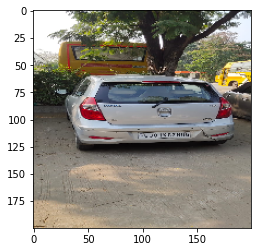

1/1 [==============================] - 0s 301ms/step
[[1.]]
VEHICLE


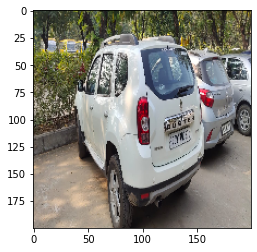

1/1 [==============================] - 0s 15ms/step
[[1.]]
VEHICLE


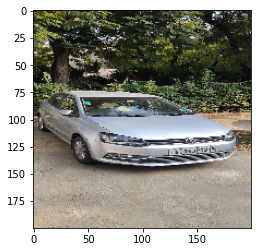

1/1 [==============================] - 0s 16ms/step
[[1.]]
VEHICLE


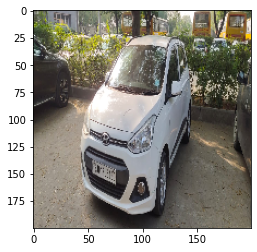

1/1 [==============================] - 0s 14ms/step
[[0.]]
NON VEHICLE


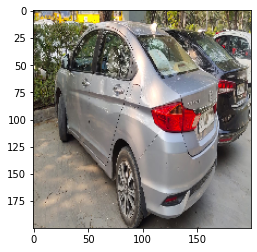

1/1 [==============================] - 0s 14ms/step
[[1.]]
VEHICLE


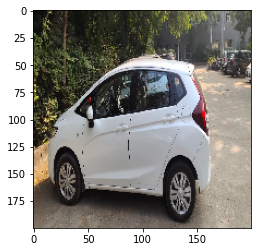

1/1 [==============================] - 0s 16ms/step
[[1.]]
VEHICLE


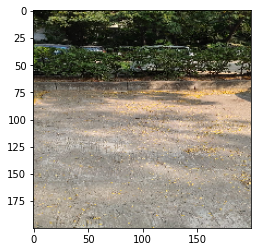

1/1 [==============================] - 0s 25ms/step
[[0.]]
NON VEHICLE


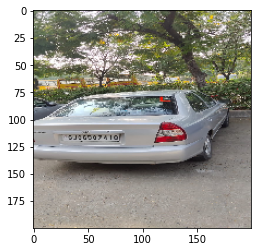

1/1 [==============================] - 0s 25ms/step
[[1.]]
VEHICLE


In [ ]:
# testing dataset
dir_path = '/content/drive/MyDrive/Image_Classification/test_for_vgg'
# Reading every image and check it is classifying correctly
for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//'+ i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
  images = np.vstack([X])
  val = model.predict(images)
  print(val)
  if val == 0:
    print("NON VEHICLE")
  else:
    print("VEHICLE")


In [ ]:
import matplotlib.pyplot as plot
import tensorflow as tf
import matplotlib.pyplot as plt

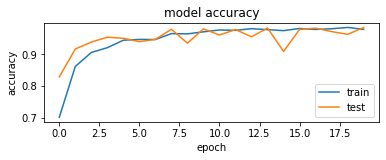

In [ ]:
plot.subplot(2,1,1)
plot.plot(model_fit.history['acc'])
plot.plot(model_fit.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

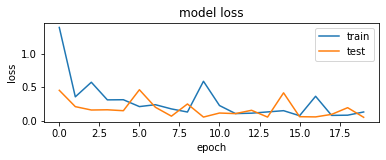

In [ ]:
plot.subplot(2,1,2)
plot.plot(model_fit.history['loss'])
plot.plot(model_fit.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/Image_Classification/custome_model.json", "w") as json_file:
  json_file.write(model_json)
  model.save("/content/drive/MyDrive/Image_Classification/custome_model.h5")
  print("Saved model to disk")
  model.save_weights("/content/drive/MyDrive/Image_Classification/custom_vehicles.h5")

Saved model to disk
